In [2]:
from urllib.request import Request, urlopen
import json
import pandas as pd

In [3]:
COOKIE = 'lang_pref=en; _ga=GA1.2.1416690212.1542720478; _gaexp=GAX1.2.in5y_1ubT--YS9vbKucGEQ.17934.0!JF2DnSL3QxqJ9mYHYEsksA.17948.0; asana_orig_attr=%7B%22source%22%3A%22%22%2C%22query_string%22%3A%22%22%2C%22exit_page%22%3A%22%2F%22%2C%22landing_page%22%3A%22%2F%22%2C%22useragent%22%3A%22Mozilla%2F5.0%20(X11%3B%20Linux%20x86_64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F69.0.3497.100%20Safari%2F537.36%22%2C%22timestamp%22%3A1542720479%2C%22convNum%22%3A184077389%7D; _mhbktsv=dbm; _gcl_au=1.1.705567108.1542720481; user=421257675580403; auth_token=4878928370e04ee61d9ecf6dd5ad9a9c; ticket=96ac9e57ad164be513d22b4819248455a6d1a75f41e53768e043565f6115428a; is_logged_in=true; last_domain=2653227806782; p=0; luna_db_server_query_string=userId=421257675580403&shardId=2653227806782; xsrf_token=29zwr0qaeg6; optimizelyEndUserId=oeu1543865286842r0.936769239108139; optimizelySegments=%7B%22175086470%22%3A%22search%22%2C%22175122859%22%3A%22gc%22%2C%22175132201%22%3A%22false%22%2C%226118411233%22%3A%22none%22%7D; optimizelyBuckets=%7B%7D; _gid=GA1.2.807233534.1543865288; asana_attr=%7B%22source%22%3A%22https%3A%2F%2Fwww.google.com.br%2F%22%2C%22query_string%22%3A%22%22%2C%22exit_page%22%3A%22%2F2014%2F09%2Fexport-to-csv%2F%22%2C%22landing_page%22%3A%22%2F2014%2F09%2Fexport-to-csv%2F%22%2C%22useragent%22%3A%22Mozilla%2F5.0%20(X11%3B%20Linux%20x86_64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F70.0.3538.110%20Safari%2F537.36%22%2C%22timestamp%22%3A1543865289%2C%22cookie%22%3A%7B%22source%22%3A%22%22%2C%22query_string%22%3A%22%22%2C%22exit_page%22%3A%22%2F%22%2C%22landing_page%22%3A%22%2F%22%2C%22useragent%22%3A%22Mozilla%2F5.0%20(X11%3B%20Linux%20x86_64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F69.0.3497.100%20Safari%2F537.36%22%2C%22timestamp%22%3A1542720479%2C%22convNum%22%3A184077389%7D%7D; asana_experiments={}; NaN_hash=a9c129b1PYDVOSJX1543865291117; _fbp=fb.1.1543865291260.1213621006; server=prod-ws127.ec2|XAWFL'

In [4]:
def request_json(url):
    request = Request(url)
    request.add_header('Content-Type', 'application/json')
    request.add_header('Cookie', COOKIE)

    data = json.loads(urlopen(request).read().decode('utf-8'))
    return data

In [5]:
data = request_json('https://app.asana.com/api/1.0/projects/680563298779433/tasks?opt_pretty&opt_expand=(this%7Csubtasks%2B)')

In [6]:
data.get('data')[0]

{'assignee': None,
 'assignee_status': 'upcoming',
 'completed': False,
 'completed_at': None,
 'created_at': '2018-07-02T21:03:24.112Z',
 'custom_fields': [{'enabled': True,
   'gid': '207648931279186',
   'id': 207648931279186,
   'name': 'Estimate',
   'number_value': None,
   'precision': 0,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'gid': '326509860716922',
   'id': 326509860716922,
   'name': 'Time spent',
   'number_value': None,
   'precision': 1,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'enum_options': [{'color': 'pink',
     'enabled': True,
     'gid': '839796772462332',
     'id': 839796772462332,
     'name': 'Backlog',
     'resource_type': 'enum_option'},
    {'color': 'cool-gray',
     'enabled': True,
     'gid': '833194452969145',
     'id': 833194452969145,
     'name': 'Baixa',
     'resource_type': 'enum_option'},
    {'co

In [7]:
df = pd.read_json(json.dumps(data.get('data')))
df.head()

,assignee,assignee_status,completed,completed_at,created_at,custom_fields,due_at,due_on,followers,gid,...,num_hearts,num_likes,parent,projects,resource_subtype,resource_type,start_on,subtasks,tags,workspace
0,None,upcoming,False,NaT,2018-07-02 21:03:24.112,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",730452261753984,...,0,0,None,"[{'gid': '680563298779433', 'name': 'FRONT KAM...",section,task,None,[],[],"{'gid': '2653227806782', 'name': 'Chaordic', '..."
1,"{'gid': '421257675580403', 'name': 'Luan Arald...",inbox,True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",820637064816196,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,"[{'hearted': False, 'assignee': {'gid': '42125...","[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
2,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-10-26 22:25:27.792,2018-10-23 14:06:41.498,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",878362291588530,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
3,"{'gid': '633968712880933', 'name': 'Caio Amara...",inbox,True,2018-12-03 18:59:25.032,2018-11-29 19:36:45.448,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",928216055716059,...,0,0,"{'gid': '898807941571417', 'name': '[drogaraia...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '12438359298694', 'name': 'CC:Mail', ...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
4,"{'gid': '517130048139702', 'name': 'Felipe Bre...",inbox,True,2018-10-25 20:37:43.776,2018-10-25 18:35:11.589,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '517130048139702', 'name': 'Felipe Br...",883197588138604,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."


In [8]:
df.describe()

,gid,id,num_hearts,num_likes
count,4.880000e+02,4.880000e+02,488.000000,488.000000
mean,8.246077e+14,8.246077e+14,0.006148,0.006148
std,8.632872e+13,8.632872e+13,0.078245,0.078245
min,5.364914e+14,5.364914e+14,0.000000,0.000000
25%,7.678085e+14,7.678085e+14,0.000000,0.000000
50%,8.479441e+14,8.479441e+14,0.000000,0.000000
75%,9.033609e+14,9.033609e+14,0.000000,0.000000
max,9.321060e+14,9.321060e+14,1.000000,1.000000


In [32]:
df[(df['completed_at'] > '2018-01-12') & (df['completed_at'] < '2019-02-01')]

,assignee,assignee_status,completed,completed_at,created_at,custom_fields,due_at,due_on,followers,gid,...,num_hearts,num_likes,parent,projects,resource_subtype,resource_type,start_on,subtasks,tags,workspace
1,"{'gid': '421257675580403', 'name': 'Luan Arald...",inbox,True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",820637064816196,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,"[{'hearted': False, 'assignee': {'gid': '42125...","[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
2,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-10-26 22:25:27.792,2018-10-23 14:06:41.498,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",878362291588530,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
3,"{'gid': '633968712880933', 'name': 'Caio Amara...",inbox,True,2018-12-03 18:59:25.032,2018-11-29 19:36:45.448,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",928216055716059,...,0,0,"{'gid': '898807941571417', 'name': '[drogaraia...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '12438359298694', 'name': 'CC:Mail', ...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
4,"{'gid': '517130048139702', 'name': 'Felipe Bre...",inbox,True,2018-10-25 20:37:43.776,2018-10-25 18:35:11.589,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '517130048139702', 'name': 'Felipe Br...",883197588138604,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
5,"{'gid': '421257675580403', 'name': 'Luan Arald...",inbox,True,2018-10-25 17:28:35.584,2018-10-24 20:36:55.286,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",881568047442441,...,0,0,"{'gid': '650120852297197', 'name': '[comprafoo...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '12563780798218', 'name': 'CC:Base', ...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
7,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-10-19 19:20:51.279,2018-10-18 20:55:39.998,"[{'resource_subtype': 'number', 'precision': 0...",NaT,2018-10-18,"[{'gid': '354706923192815', 'name': 'Denise Gi...",873463559067660,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,"[{'hearted': False, 'assignee': None, 'gid': '...","[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
8,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-10-22 19:43:25.560,2018-10-19 19:50:35.963,"[{'resource_subtype': 'number', 'precision': 0...",NaT,2018-10-19,"[{'gid': '382166779424552', 'name': 'Gleice So...",874949707469130,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,"[{'hearted': False, 'assignee': None, 'gid': '...","[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
10,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-08-29 19:55:28.025,2018-08-29 17:58:24.532,"[{'resource_subtype': 'number', 'precision': 0...",NaT,2018-08-29,"[{'gid': '208319495637564', 'name': 'Eduardo',...",7997907775661

In [9]:
assignee_df = pd.read_json(df.assignee.to_json())
assignee_list = list(json.loads(df.assignee.to_json()).values())
assignee_df = pd.read_json(json.dumps(list(filter(None.__ne__, assignee_list))))
assignee_df.head()

,gid,id,name,resource_type
0,15423278950548,15423278950548,Karen Costa,user
1,421257675580403,421257675580403,Luan Araldi,user
2,740609885432490,740609885432490,Guilherme Pries,user
3,662420552271652,662420552271652,Jhonatan Tomimatsu,user
4,343284046050773,343284046050773,raphael.ribeiro,user


# Assignees

In [10]:
assignee_df['name'].value_counts()

Jhonatan Tomimatsu                 82
Caio Amaral                        41
Eduardo                            39
Luan Araldi                        38
Denise Giubilei                    37
Karen Costa                        32
Anderson Silva                     26
Gleice Souza                       22
Felipe Becker                      18
Guilherme Pries                    13
Carlos Eduardo Libardo              9
raphael.ribeiro                     6
William Silva Godoy                 6
Cássio Couto                        5
Weslley Azevedo                     5
Ivanildo de Castro                  3
Tácio Medeiros                      3
Heron Monteiro                      3
Marta                               2
Marcos Siqueira Junior              2
Victor Oliveira                     2
Tyller Jor'El                       2
giancarlo.freitas                   2
Cássio Böck                         2
juliana                             2
Felipe Bremer de Moraes             2
Marx Guimara

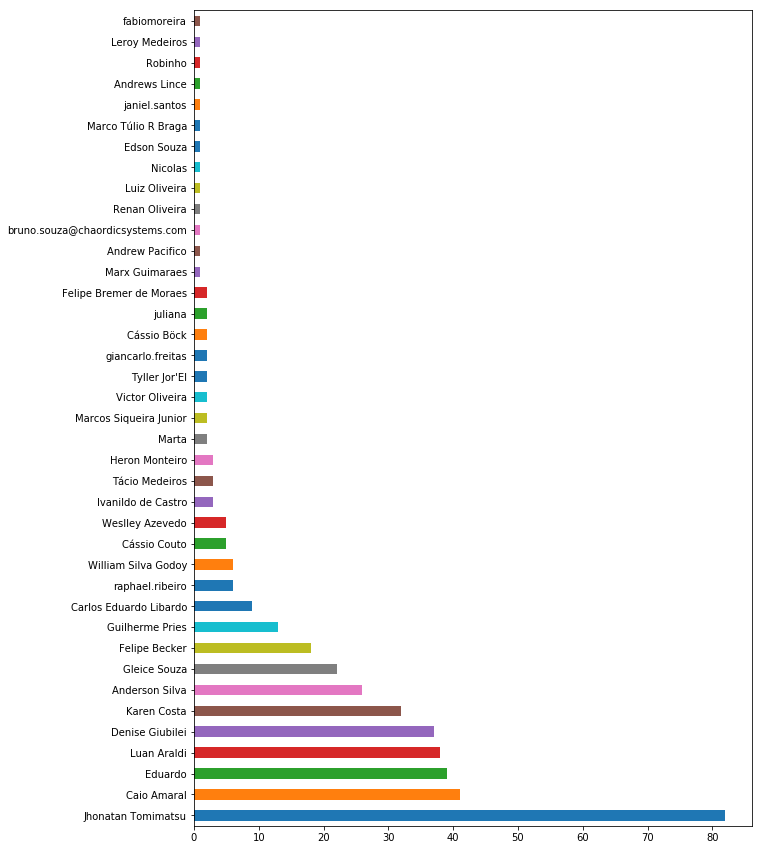

In [25]:
assignee_df['name'].value_counts().plot(kind='barh', figsize=(10, 15))

In [27]:
df.head()

,assignee,assignee_status,completed,completed_at,created_at,custom_fields,due_at,due_on,followers,gid,...,num_hearts,num_likes,parent,projects,resource_subtype,resource_type,start_on,subtasks,tags,workspace
0,None,upcoming,False,NaT,2018-07-02 21:03:24.112,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",730452261753984,...,0,0,None,"[{'gid': '680563298779433', 'name': 'FRONT KAM...",section,task,None,[],[],"{'gid': '2653227806782', 'name': 'Chaordic', '..."
1,"{'gid': '421257675580403', 'name': 'Luan Arald...",inbox,True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",820637064816196,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,"[{'hearted': False, 'assignee': {'gid': '42125...","[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
2,"{'gid': '662420552271652', 'name': 'Jhonatan T...",inbox,True,2018-10-26 22:25:27.792,2018-10-23 14:06:41.498,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",878362291588530,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
3,"{'gid': '633968712880933', 'name': 'Caio Amara...",inbox,True,2018-12-03 18:59:25.032,2018-11-29 19:36:45.448,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '633968712880933', 'name': 'Caio Amar...",928216055716059,...,0,0,"{'gid': '898807941571417', 'name': '[drogaraia...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '12438359298694', 'name': 'CC:Mail', ...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
4,"{'gid': '517130048139702', 'name': 'Felipe Bre...",inbox,True,2018-10-25 20:37:43.776,2018-10-25 18:35:11.589,"[{'resource_subtype': 'number', 'precision': 0...",NaT,None,"[{'gid': '517130048139702', 'name': 'Felipe Br...",883197588138604,...,0,0,"{'gid': '684409696069679', 'name': '[apoioentr...","[{'gid': '680563298779433', 'name': 'FRONT KAM...",default_task,task,None,[],"[{'gid': '22125825955790', 'name': 'INT', 'id'...","{'gid': '2653227806782', 'name': 'Chaordic', '..."
